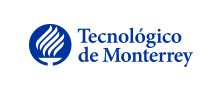

<h1><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h1>

<h3><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Second Partial Evaluation</center></h3>
    
<h3><center>Date: November 2, 2021</center></h3>

---

<h3>Grade: </h3>

---
<h4><center>Student's information</center></h4>
<h4>Name:</h4>
<h4>Student ID:</h4>

$$Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este examen esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este examen de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.$$

# Examen Parcial 2 - Aprendizaje Máquina

---

Inidicaciones: El examen consta de ejercicios prácticos, los cuales se abordan lo visto en los temas 3 y 4.

Se evalua el desarrollo adecuado de la metodología para el ajuste de los datos, el modelo y la precisión del mismo.

* Fecha de liberación del examen: Viernes 22 de octubre.

* Fecha límite de entrega: Martes 2 de noviembre hasta las 23:59 hrs

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.

En caso de no tener la información aquí solicitada, no se evaluará el examen.

---
# Sección 1

### Ingeniería de Características

---

Tomando como referencia la información en la notebook <font color=red>"Feature_Engineering"</font>, deberán utilizar los archivos de <font color=blue>"train.csv"</font> y <font color=green>"test.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento, que es la ingeniería de características, donde a partir del análisis estadístico preliminar, podríamos sustituir, ajustar, imputar datos o crear nuevas variables con fines prácticos.

----

Idea: Aplicar su propio pipeline para replicar o mejorar los resultados de predicción de los diversos algoritmos puestos en dicha notebook. Pueden enfocarse solamente en los primeros 5 algoritmos que tuvieron un desempeño mayor al 79% en este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron, así como el porqué es conveniente (o no) aplicar validación cruzada (CV) y gridsearch.

In [ ]:
#Importación de algortimos con accuracy mayor al 79%
#Importación de librerías para manejo de datos
import pandas as pd
import numpy as np
import random as rnd

#Importación de librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importación de algoritmos ML, únicamente los de >79%
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
#Carga de datos y unión de ambos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

In [ ]:
#Observamos estructura de data.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clasificación
### Preguntas de Análisis

* ¿Qué características están disponibles en el conjunto de datos?
            Contamos con id de pasajero, si sobrevivió o no, clase, nombre, sexo, año, ticked, cuera, cabina, embarcamiento, etc.
* ¿Qué variables son categóricas?
            Survived, Pclass, Sex, SibSp, Embarked
* ¿Hay variables numéricas?
            Sí tenemos el id, la edad y la cuera
* ¿Qué variables tienen tipos de datos mezclados? (numérico, alfanumérico, etc...)
            Contamos con las variables de nombre, ticket y cabinas

# Correlación.

#### Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una correlación entre una característica y el objetivo de la solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado.

Para realizar el análisis de correlación nos basaremos en el trabajo previo ya realizado, para esto haremos pivoteo con variables de dataset.

### Pivotéo con PClass, establece la clase en la que se iba viajando

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Se puede observar que existe una relación de Pclass con el índice se supervicencia, decrece con el aumento del nivel de Pclass.

### Pivotéo con Sex, establece la el sexo de los pasajeros

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Se puede observar que existe una relación del sexo con el índice se supervicencia, decrece la probabilidad de supervivencia si eres hombre.

### Las variables Sibling per Person (SibSp), Parch y demás no parecen demostrar una relación debido a eso no son mencionadas. 

## Análisis Visual

### Edad vs Supervivencia

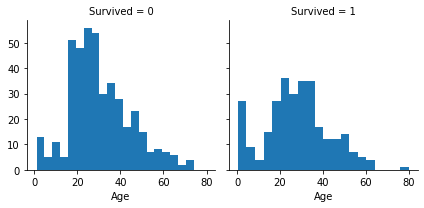

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Se puede mostrar un mayor índice de supervivencia en personas menores a los 10 años y personas entre 20 y 40 años, que ya podemos ir pensando que la mayoría son mujeres

# Convirtiendo y Completando

### Limpieza de Variables

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creando categorización por prefijo de nombre

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Adicionando categorización al dataset

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


## Eliminación de nombres y únicamente nos quedamos con sus prefijos, ya que los nombres son insignificantes, columna Title

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


### Cambiando sexo a categorización numérica para mejor implementación en algoritmos de ML

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Creación de intervalos de categorización para las edades.

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Ahora iteramos sobre Sexo (0 o 1) y Pclass (1, 2, 3) para calcular los valores de Edad para las seis combinaciones.

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


## Asignación de valores clasificatorios por intervalos de edades al data frame.

In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


## En conjunto

In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### Añadimos columna del tamaño de la familia del individuo

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


#### Añadimos columna en el caso de que iba sólo en el titanic

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Observamos en primera instancia una posible relación, sin embargo, no es confirmable, pero hubo un mayor índice en los que iban solos

### Añadimos Columnas al main dts

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


### Creamos relación en de clase con edad

In [ ]:
test_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,1,1
1,893,3,1,2,7.0000,S,3,0
2,894,2,0,3,9.6875,Q,1,1
3,895,3,0,1,8.6625,S,1,1
4,896,3,1,1,12.2875,S,3,0


In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## Resolución de vacíos, NA's, Variables categóricas sin enumeramiento y demás.

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


## Conversión de intervalos y unión de columnas creadas

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


## Verificamos Dataset

In [ ]:
train_df.isna()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [ ]:
train_df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## Tenemos listo el dataset para la implementación de los algoritmos de ML, dado que el ejercicio es la implementación con CV y GridSearch, se procede a la implementación de estos con los algoritmos asignados con accuracy mayor al 79%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = train_df.drop(train_df.columns[0], axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [ ]:
X

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6
...,...,...,...,...,...,...,...,...
886,2,0,1,1,0,5,1,2
887,1,1,1,2,0,2,1,1
888,3,1,1,2,0,2,0,3
889,1,0,1,2,1,1,1,1


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
## Realizamos la importación de make_pipeline para crear un pipelina con los modelosdeseados se sklearn, utilizaremos robust scaler para
## normalización, ya que ya tenemos nuestro df limpio y con puros datos numéricos.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler



In [ ]:
#Creación de pipelines con los 5 mejores modelos seleccionados

In [ ]:
pipeline_logistic_regression = make_pipeline(\
                         RobustScaler(),
                         LogisticRegression(solver='liblinear'))


In [ ]:
pipeline_svc = make_pipeline(\
                         RobustScaler(),
                         SVC())

In [ ]:
pipeline_random_forest = make_pipeline(\
                         RobustScaler(),
                         RandomForestClassifier(n_estimators=10, max_depth=3, random_state=10))

In [ ]:
pipeline_k_neighbors = make_pipeline(\
                         RobustScaler(),
                         KNeighborsClassifier())

In [ ]:
pipeline_decision_tree = make_pipeline(\
                         RobustScaler(),DecisionTreeClassifier())

In [ ]:
pipeline = make_pipeline(\
                         RobustScaler(),
                         LogisticRegression(solver='liblinear'))

In [ ]:
pipeline = make_pipeline(\
                         RobustScaler(),
                         LogisticRegression(solver='liblinear'))

## CrossValidation con KfoldShuffle

In [ ]:
#CrossValidation con LogisticRegression
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_logistic_regression.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_logistic_regression.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_logistic_regression.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df


,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.808989,0.826816
1,0.807854,0.769663
2,0.809257,0.808989
3,0.788219,0.814607
4,0.806452,0.792135


In [ ]:
#CrossValidation con SVC
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_svc.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_svc.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_svc.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df

,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.785112,0.787709
1,0.788219,0.764045
2,0.784011,0.780899
3,0.771388,0.825843
4,0.792426,0.741573


In [ ]:
#CrossValidation con Random Forest
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_random_forest.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_random_forest.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_random_forest.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df

,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.799157,0.798883
1,0.800842,0.730337
2,0.791024,0.814607
3,0.785414,0.820225
4,0.800842,0.792135


In [ ]:
#CrossValidation con KNeighbors
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_k_neighbors.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_k_neighbors.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_k_neighbors.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df

,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.834270,0.804469
1,0.861150,0.775281
2,0.837307,0.786517
3,0.824684,0.853933
4,0.856942,0.786517


In [ ]:
#CrossValidation con Decision Tree
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_decision_tree.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_decision_tree.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_decision_tree.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df

,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.866573,0.815642
1,0.877980,0.775281
2,0.872370,0.831461
3,0.861150,0.865169
4,0.880785,0.758427


# Grid Search

In [ ]:
## Grid Search con Logistic Regression
pipeline = make_pipeline(\
                         RobustScaler(),
                         SelectKBest(f_classif),
                         LogisticRegression(max_iter=100))
param_grid = {
    'selectkbest__k': [i+1 for i in range(8)],
    'logisticregression__class_weight': [None,'balanced'],
    'logisticregression__C': [.1, 1.0, 10.0, 100.00, 1000.0, 10000.0],
    'logisticregression__solver': ['lbfgs', 'liblinear'],
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='accuracy', verbose=1, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=100
                                                   )

gridsearch.fit(X_train, y_train)

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)



Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross Validation Score: 0.8083492312871732
Accuracy Score on test data set: 0.8026905829596412


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    9.9s finished


In [ ]:
## Grid Search con SVC
pipeline = make_pipeline(\
                         RobustScaler(),
                         SelectKBest(f_classif),
                         SVC(C=0.1))
param_grid = {
    'selectkbest__k': [i+1 for i in range(8)],
    'svc__class_weight': [None,'balanced'],
    'svc__C': [.1, 1.0, 10.0, 100.00, 1000.0, 10000.0],
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='accuracy', verbose=1, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=100
                                                   )

gridsearch.fit(X_train, y_train)

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   16.4s finished


Cross Validation Score: 0.8263382336438111
Accuracy Score on test data set: 0.8026905829596412


In [ ]:
## Grid Search con RandomForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

 #Classifier Pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=8))
])

params = {"classifier__max_depth": [0.4]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=8,
                         scoring='accuracy', verbose=1, return_train_score=True)

gridsearch.fit(X_train, y_train)

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Cross Validation Score: 0.6317412507171543
Accuracy Score on test data set: 0.8026905829596412


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


In [ ]:
## Grid Search con KNeighbors
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('knn', knn)])

param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

grid = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')


grid.fit(X_train, y_train)

print('Cross Validation Score:', grid.best_score_)
print('Accuracy Score on test data set:', test_score)

Cross Validation Score: 0.8157847127996382
Accuracy Score on test data set: 0.8026905829596412


In [ ]:
## Grid Search con Decision Tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

 #Classifier Pipeline
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

params = {"classifier__max_depth": [0.4]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=8,
                         scoring='accuracy', verbose=1, return_train_score=True)

gridsearch.fit(X_train, y_train)

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Cross Validation Score: 0.6086922596754057
Accuracy Score on test data set: 0.8026905829596412


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


---
---

# Sección 2

### Recomendaciones usando técnicas de ML (Web Scrapping, Supervised, Unsupervised)

---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de <font color=blue>"anime.csv"</font> y <font color=green>"rating.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento. Posteriormente, la aplicación del análisis de componentes principales (PCA), k-means y la descripción de las recomendaciones para al menos 3 clusters generados.

Aplicar la técnica de webscrapping y explicar su funcionamiento (**puede tardar desde 10 minutos hasta 1 hora aproximadamente; dependiendo la cantidad de registros que hayan usado**). Tomen en cuenta que esta búsqueda va acorde a los ids del conjunto de datos que les hace falta información y, a partir de esta técnica de minería de datos, completamos los registros faltantes.

Posteriormente, entrenar el algoritmo de k-NN para obtener las distancias de cada id del conjunto de datos, para obtener los indices y distancias correspondientes que nos servirán para proporcionar recomendaciones con respecto a estos resultados.

----

Idea: Aplicar su propio pipeline para replicar los resultados de predicción/recomendación de este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron.

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

In [1]:
#Aquí sus códigos (añadan las líneas necesarias)

---
---

# Sección 3

### Aplicación de modelos de DL
---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de las imágenes en <font color=blue>"dataset"</font>, de los apartados <font color=magenta>covid y normal</font> (**podrían tratar de añadir más imágenes a cada tipo para mejorar los resultados**) y, finalmente, probar el modelo con imágenes del set de datos en la carpeta <font color=green>"test"</font> como punto de referencia.

Aplicaremos la red VGG16 (pero podrían ver la posibilidad de tratar de aplicar otro modelo de los que se encuentran en **tensorflow.keras.applications**).

Pueden tratar de jugar con la estructura definida en *"base model"*, siempre y cuando hayan visto el link que viene al final de ese apartado de dicha red VGG16.

-----
Podemos jugar un poco con la información de las inicialiaciones de las variables **INIT_LR, EPOCS, BS** para observar si hay o no mejoría en los resultados de entrenamiento.

Aplicar la técnica de DL y explicar su funcionamiento (**puede tardar desde 5 hasta 30 minutos aproximadamente; 5 minutos con los datos proporcionados, más tiempo en caso de añadir nuevas imágenes**).

----

En cada apartado, traten de explicar el proceso que se está llevando a cabo.

Primero, tenemos que importar las librerías que utilizaremos

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
!pip install imutils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

You should consider upgrading via the 'C:\Users\sebas\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=4021807c5c27a2ad83fd5fb9f492b62ee496f47418ae6c3426e8b57b301ac933
  Stored in directory: c:\users\sebas\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


Definimos:
- El learning rate a 0.005
- Las épocas a 30
- Y el batch size a 5
Utilizaremos estas variables al momento de entrenar nuestro modelo

In [35]:
INIT_LR = 5e-3
EPOCHS = 30
BS = 5

Definimos el path de las imágenes y definimos un array de datos de imágenes (este será nuestra 'X') y de etiquetas (este será nuestra 'Y' objetivo)

In [36]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images("dataset/"))
data = []
labels = []

[INFO] loading images...


- Cargamos las imágenes a memoria y etiquetas a memoria
- Realizamos transformaciones del color de las imágenes para que pasen de BGR a RGB
- Transformamos las imágenes para que todas tengan la misma resolución de 224x224
- Agregamos las imágenes transformadas y etiquetas a sus respectivos arrays

In [37]:
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

Realizaremos el mismo proceso para las imágenes de test

In [38]:
miniTest = list(paths.list_images("test/"))
test1 = []
test2 = []

In [39]:
for imageP in miniTest:
    lbl = imageP.split(os.path.sep)[-1]
    img = cv2.imread(imageP)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    test1.append(img)
    test2.append(lbl)

Normalizamos los datos de las imágenes para que se encuentren entre 0 y 1. Además convertimos los arrays de python a numpy arrays. También estamos usando `LabelBinarizer()` que realiza el mismo proceso que `OneHotEncoder()`.

In [40]:
data = np.array(data) / 255.0
labels = np.array(labels)

test1 = np.array(test1) / 255.0
test2 = np.array(test2)

lbs = LabelBinarizer()
labels = lbs.fit_transform(labels)
labels = to_categorical(labels)

lbs2 = LabelBinarizer()
test2 = lbs2.fit_transform(test2)
test2 = to_categorical(test2)

- Realizamos el split de los datos, con una proproción de 0.80/0.20, con labels estratificadas y una semilla de 42
- Realizamos tranformaciones a las imágenes con el objetivo de que el modelo aprenda a identificarlas desde distintas rotaciones, por ejemplo
- El modelo que utilizaremos será VGG16 entrenado previamente con el dataset de Imagenet, la opción `include_top` es `False` para que podamos utilizar este modelo para la transferncia de conocimiento

In [41]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

Definimos las siguientes capas para nuestra CNN:
- Nuestro modelo base (VGG16)
- Utilizamos la capa `AveragePooling2D` para reducir la muestra de los datos, se obtendrá el promedio de secciones de 4x4 de las imágenes, por lo que se tendrá como resultado final una muestra de 56x56
- Utilizamos `Flatten`para "aplanar" las dimensiones del output anterior, de tal manera que quedaría como: 3136x1
- Utilizamos una capa densa con una función de activación `relu`
- Indicamos un `Dropout` del 50% para que cada neurona tenga un 50% de "apagarse", con el objetivo de que otras neuronas no se hagan dependientes de esta y que la precisión del modelo mejore con ello
- Finalmente, agregamos una última capa densa con una función de activación `softmax`

In [42]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

Compilamos el modelo indicando como se calculará su pérdida, cuál es el optimizador que utilizaremos (que en este caso es `Adam`) y las métricas

In [43]:
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Entrenamos el modelo con las épcas y batch size previamente definidas

In [44]:
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/30


C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


8/8 [==============================] - 4s 480ms/step - loss: 0.8341 - accuracy: 0.5250 - val_loss: 0.6800 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 4s 449ms/step - loss: 0.6979 - accuracy: 0.6000 - val_loss: 0.6293 - val_accuracy: 0.9000
Epoch 3/30
8/8 [==============================] - 4s 451ms/step - loss: 0.6925 - accuracy: 0.5500 - val_loss: 0.6275 - val_accuracy: 0.5000
Epoch 4/30
8/8 [==============================] - 4s 458ms/step - loss: 0.5675 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.8000
Epoch 5/30
8/8 [==============================] - 4s 460ms/step - loss: 0.5635 - accuracy: 0.7500 - val_loss: 0.5311 - val_accuracy: 0.9000
Epoch 6/30
8/8 [==============================] - 4s 459ms/step - loss: 0.5304 - accuracy: 0.7750 - val_loss: 0.5151 - val_accuracy: 0.9000
Epoch 7/30
8/8 [==============================] - 4s 489ms/step - loss: 0.4717 - accuracy: 0.8250 - val_loss: 0.4701 - val_accuracy: 1.0000
Epoch 8/30
8/8 [===============

Probamos el modelo con los datos asignados para la prueba y obtenemos el reporte de clasificación de esta predicción, en nuestro caso podemos notar que el modelo predijo correctamente todos los casos de prueba

In [45]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lbs.classes_))

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[INFO] evaluating network...
                precision    recall  f1-score   support

 dataset/covid       1.00      1.00      1.00         5
dataset/normal       1.00      1.00      1.00         5

      accuracy                           1.00        10
     macro avg       1.00      1.00      1.00        10
  weighted avg       1.00      1.00      1.00        10

[[5 0]
 [0 5]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


En la siguiente gráfica podemos notar como incrementa nuestro `accuracy` a medida que incrementan las épocas (estando por encima del 80% en la mayoría de iteraciones) y cómo disminuye la pérdida.

[INFO] saving COVID-19 detector model...


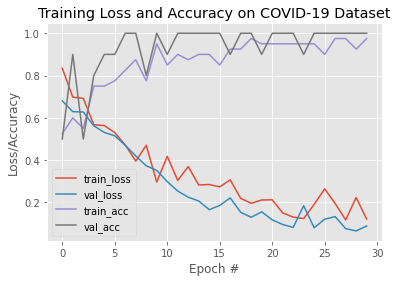

In [46]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("results.png")

print("[INFO] saving COVID-19 detector model...")
model.save("testing.model", save_format="h5")

Finalmente, podemos evaluar las dos imágenes de la carpeta de `tests` con nuestro modelo

In [49]:
print("[INFO] evaluating network...")
predIdxs = model.predict(test1, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test2.argmax(axis=1), predIdxs, target_names=lbs2.classes_))

[INFO] evaluating network...
                precision    recall  f1-score   support

 test/test.jpg       0.50      1.00      0.67         1
test/test2.jpg       0.00      0.00      0.00         1

      accuracy                           0.50         2
     macro avg       0.25      0.50      0.33         2
  weighted avg       0.25      0.50      0.33         2



C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Como podemos ver, solo se predijo correctamente uno de los casos de prueba

In [51]:
cm = confusion_matrix(test2.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[1 0]
 [1 0]]
acc: 0.5000
sensitivity: 1.0000
specificity: 0.0000
